# **Import Libraries**


In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier


Dataset 1- Pima Indian dataset

In [ ]:
Pima_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Before Dropping the Null values

In [ ]:
Pima_dataset.shape

(768, 9)

Find  the details of all the **Attributes**

In [ ]:
Pima_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
Pima_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 5
number of rows with missing BloodPressure 0 is: 35
number of rows with missing skin thikness 0 is: 227
number of rows with Insulin 0 is: 374
number of rows with BMI 0 is: 11
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(Pima_dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])


In [ ]:
print("number of rows with glucose value 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(Pima_dataset.loc[Pima_dataset['Age'] == 0])))


number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


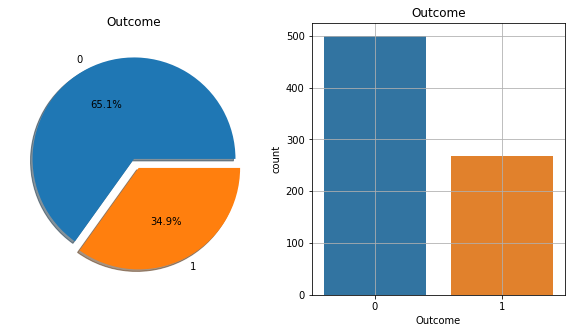

In [ ]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
Pima_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=Pima_dataset, ax=ax[1])
ax[1].set_title('Outcome')
N,P = Pima_dataset['Outcome'].value_counts()

plt.grid()
plt.show()

In [ ]:
Pima_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# **Split the Data (Train Test Split)**

In [ ]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [ ]:
X_smote, X_test, y_smote, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_smote, y_smote, random_state = 0)
mutual_info


array([0.01555395, 0.11796705, 0.01509219, 0.01035643, 0.02548305,
       0.07923143, 0.        , 0.04601336])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_smote.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.117967
BMI                         0.079231
Age                         0.046013
Insulin                     0.025483
Pregnancies                 0.015554
BloodPressure               0.015092
SkinThickness               0.010356
DiabetesPedigreeFunction    0.000000
dtype: float64

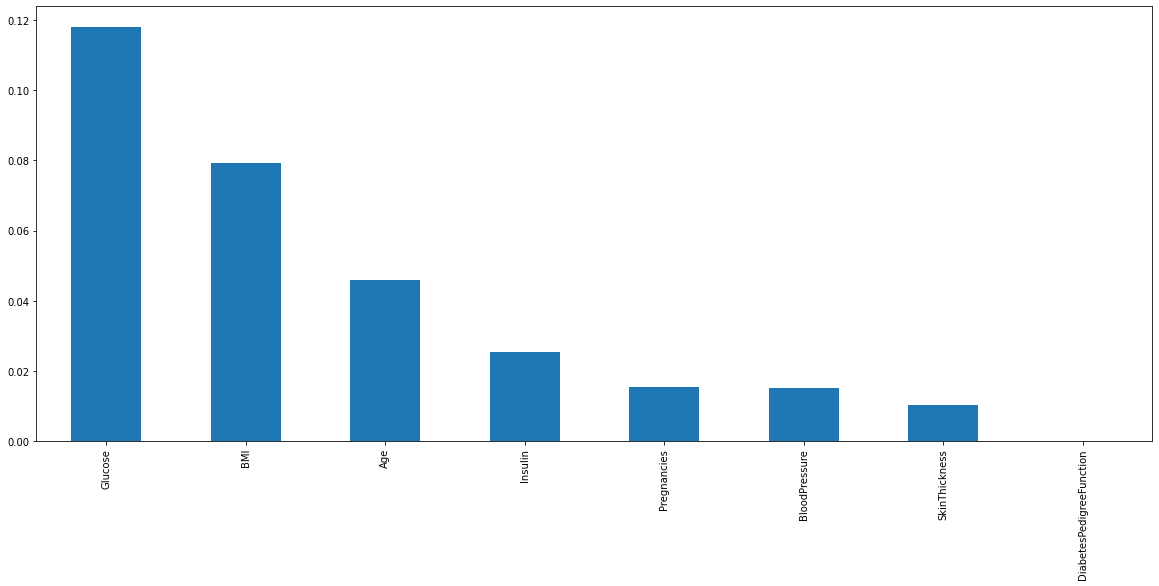

In [ ]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [ ]:
#So we decided to drp the DiabetesPedigreeFunction column
Pima_dataset.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)

In [ ]:
Pima_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,54,1


In [ ]:
X = Pima_dataset.drop(columns='Outcome', axis=1)
Y = Pima_dataset['Outcome']

In [ ]:
X_smote, X_test, y_smote, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y )

In [ ]:
print(X.shape, X_smote.shape,y_smote.shape, X_test.shape)

(768, 7) (614, 7) (614,) (154, 7)


#  **Grid search on svm (PERFECTLY DONE)**



In [ ]:
# We need to scale correctly (We will use MinMax Scaler to do this)
cols_to_scale = ['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Age']
scaler = MinMaxScaler()
scaler.fit(X_smote[cols_to_scale])
X_smote[cols_to_scale] = scaler.transform(X_smote[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [ ]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.740 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.756 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.770 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=10, gamma=0.01)

In [ ]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[93  7]
 [27 27]]
Accuracy Score 0.7792207792207793
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       100
           1       0.79      0.50      0.61        54

    accuracy                           0.78       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.78      0.76       154



**K-fold cross validation(SVM)**

In [ ]:

skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
cv_score

array([0.74675325, 0.7012987 , 0.77272727, 0.78431373, 0.73856209])

In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.748731007554537 +/- 0.028979622585952318


# **Bagging Decision tree(PERFECTLY DONE)**


In [ ]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [ ]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[88 12]
 [21 33]]
Accuracy Score 0.7857142857142857
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



**K-fold cross validation (Bagging)**

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [ ]:
cv_score

array([0.77922078, 0.7012987 , 0.73376623, 0.83660131, 0.77124183])

In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7644257703081233 +/- 0.045606344089709004


# **Decision Tree(Perfectly Done)**

Depth =  2 , Training Accuracy =  0.7638436482084691 , Test Accuracy =  0.7987012987012987 , Diff =  3.485765049282963  %
Depth =  3 , Training Accuracy =  0.7671009771986971 , Test Accuracy =  0.7922077922077922 , Diff =  2.5106815009095174  %
Depth =  4 , Training Accuracy =  0.7931596091205212 , Test Accuracy =  0.7272727272727273 , Diff =  6.5886881847793894  %
Depth =  5 , Training Accuracy =  0.8273615635179153 , Test Accuracy =  0.7987012987012987 , Diff =  2.8660264816616654  %
Depth =  6 , Training Accuracy =  0.8615635179153095 , Test Accuracy =  0.7922077922077922 , Diff =  6.935572570751725  %
Depth =  7 , Training Accuracy =  0.8941368078175895 , Test Accuracy =  0.7337662337662337 , Diff =  16.03705740513558  %
Depth =  8 , Training Accuracy =  0.9267100977198697 , Test Accuracy =  0.7467532467532467 , Diff =  17.995685096662296  %
Depth =  9 , Training Accuracy =  0.9511400651465798 , Test Accuracy =  0.7207792207792207 , Diff =  23.036084436735905  %
Depth =  10 , Train

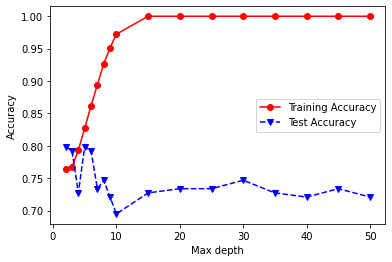

In [ ]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [ ]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 3, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7671009771986971
Testing Accuracy is:  0.7922077922077922
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [ ]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7279093455564044 +/- 0.03981987060772936


# **Logistic** **Regression(Perfectly Done)**

In [ ]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 'max_iter' : [10000],
               'warm_start' : ['False','True'],
               'penalty' : ['l1', 'l2', 'elasticnet', 'none']
               
               }

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'warm_start': ['False', 'True']},
             scoring='accuracy', verbose=1)

In [ ]:
lr_bestgrid=lr_grid.best_estimator_

In [ ]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[88 12]
 [23 31]]
Accuracy Score 0.7727272727272727
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



**Logistic regression K fold**

In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7721670486376369 +/- 0.024371895735233302


# **Gausien Naive Bays(Perfectly Done)**

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.43287612810830584}

In [ ]:
gs_NB=gs_NB.best_estimator_

In [ ]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[92  8]
 [28 26]]
Accuracy Score 0.7662337662337663
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       100
           1       0.76      0.48      0.59        54

    accuracy                           0.77       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.77      0.77      0.75       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7487394957983193 +/- 0.01809333226111009



# **Random Forest(Perfectly Done)**

In [ ]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[90 10]
 [21 33]]
Accuracy Score 0.7987012987012987
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       100
           1       0.77      0.61      0.68        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7578813343519226 +/- 0.03702067901921742


# **XG Boost(Perfectly Done)**

In [ ]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[89 11]
 [23 31]]
Accuracy Score 0.7792207792207793
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7552754435107376 +/- 0.03511274054260889


# **Ada Boost(Perfectly Done)**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7630591630591631 +/- 0.03239096921997681


# **KNN(Perfectly Done)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7662337662337663
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       100
           1       0.72      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [ ]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

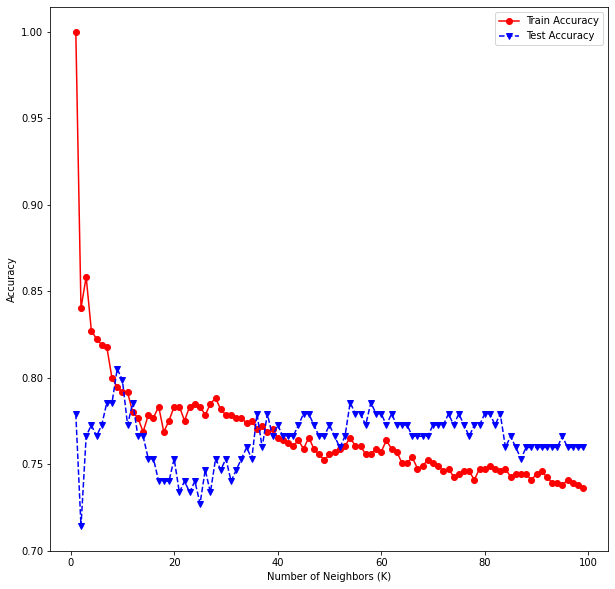

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [ ]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7792207792207793 Difference =  22.077922077922075 %
Number of neighbors =  2 Train accuracy =  0.8403908794788274 Test Accuracy =  0.7142857142857143 Difference =  12.610516519311311 %
Number of neighbors =  3 Train accuracy =  0.8583061889250815 Test Accuracy =  0.7662337662337663 Difference =  9.207242269131521 %
Number of neighbors =  4 Train accuracy =  0.8273615635179153 Test Accuracy =  0.7727272727272727 Difference =  5.463429079064264 %
Number of neighbors =  5 Train accuracy =  0.8224755700325733 Test Accuracy =  0.7662337662337663 Difference =  5.6241803798807055 %
Number of neighbors =  6 Train accuracy =  0.8192182410423453 Test Accuracy =  0.7727272727272727 Difference =  4.64909683150726 %
Number of neighbors =  7 Train accuracy =  0.8175895765472313 Test Accuracy =  0.7857142857142857 Difference =  3.18752908329456 %
Number of neighbors =  8 Train accuracy =  0.7996742671009772 Test Accuracy =  0.785714285

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=36, weights='distance')

In [ ]:
knn_bestgrid=knn_grid.best_estimator_

In [ ]:
knn_bestgrid

KNeighborsClassifier(n_neighbors=36, weights='distance')

In [ ]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[87 13]
 [24 30]]
Accuracy Score 0.7597402597402597
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7448688566335624 +/- 0.03795072436782172


# **Soft Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RF',RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimator.append(('SVC', SVC(C=100, gamma=0.1,probability=True)))
estimator.append(('ABC',AdaBoostClassifier(n_estimators=50,base_estimator=rf,learning_rate=1)))
estimator.append(('Bag',BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)))



# Voting Classifier with soft voting
Hyper_vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
Hyper_vot_soft.fit(X_smote, y_smote)
y_pred = Hyper_vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Soft Voting Score  0
[[89 11]
 [22 32]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.59      0.66        54

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7578898225957049 +/- 0.036892241378386474


## **ZeroR**


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154

Train Accuracy:  0.6514657980456026
Test Accuracy:  0.6493506493506493


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

## **Auc Curve**

In [ ]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [ ]:
final_roc_auc = []

In [ ]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [ ]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [ ]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  0.8652777777777778
roc_auc_score for KNN Classifier:  0.8292592592592593
roc_auc_score for SVM Classifier:  0.8730555555555556
roc_auc_score for Random Forest Classifier:  0.8550925925925925
roc_auc_score for Naive Bays Classifier:  0.8288888888888889
roc_auc_score for Ada Boost Classifier:  0.8583333333333334
roc_auc_score for XG Boost Classifier:  0.8503703703703704
roc_auc_score for Logistic Regression:  0.8690740740740741
roc_auc_score for Voting Classifier:  0.8683333333333333
roc_auc_score for DecisionTree:  0.8120370370370371


In [ ]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

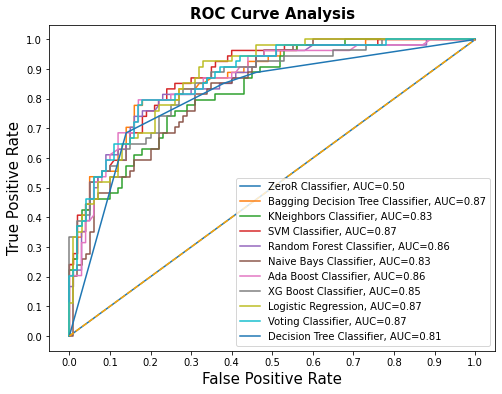

In [ ]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [ ]:
# export the figure.
fig.savefig('multiple_roc_curves.png')